In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

In [3]:
os.listdir('C:/Users/Anandh/Downloads/data')

['happy', 'sad']

In [13]:
data_dir= 'C:/Users/Anandh/Downloads/data'


In [14]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '163-1635094_happiness-love-clip-art-happy-people-transparent-background.png',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2560px-Happy_People.jpg',
 '3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog_image_20180219221810890.jpg',
 'compassion-900x387.jpg',
 'crowd-of-happy-people-poster-vector-20970718.jpg',
 'Dollarphotoclub

In [15]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [22]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

image is not in ext list C:/Users/Anandh/Downloads/data\happy\2560px-Happy_People.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\56f455011e0000b300705475.jpeg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\group-happy-people-isolated-over-600w-102307264.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\guilherme-stecanella-375176-unsplash.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\happy-people-having-fun-over-260nw-611293913.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\Happy20People.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\happy\o-HAPPY-facebook.jpg
image is not in ext list C:/Users/Anandh/Downloads/data\sad\14HRhniN7B7Fqx5GCoFpQ3A.jpeg
image is not in ext list C:/Users/Anandh/Downloads/data\sad\1800x1200_visual_guide_to_seasonal_affe

In [23]:
import numpy as np

In [25]:
data= tf.keras.utils.image_dataset_from_directory('C:/Users/Anandh/Downloads/data')

Found 148 files belonging to 2 classes.


In [26]:
data_iterator= data.as_numpy_iterator()

In [27]:
batch=data_iterator.next()

In [28]:
batch[1]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [29]:
batch[0].shape

(32, 256, 256, 3)

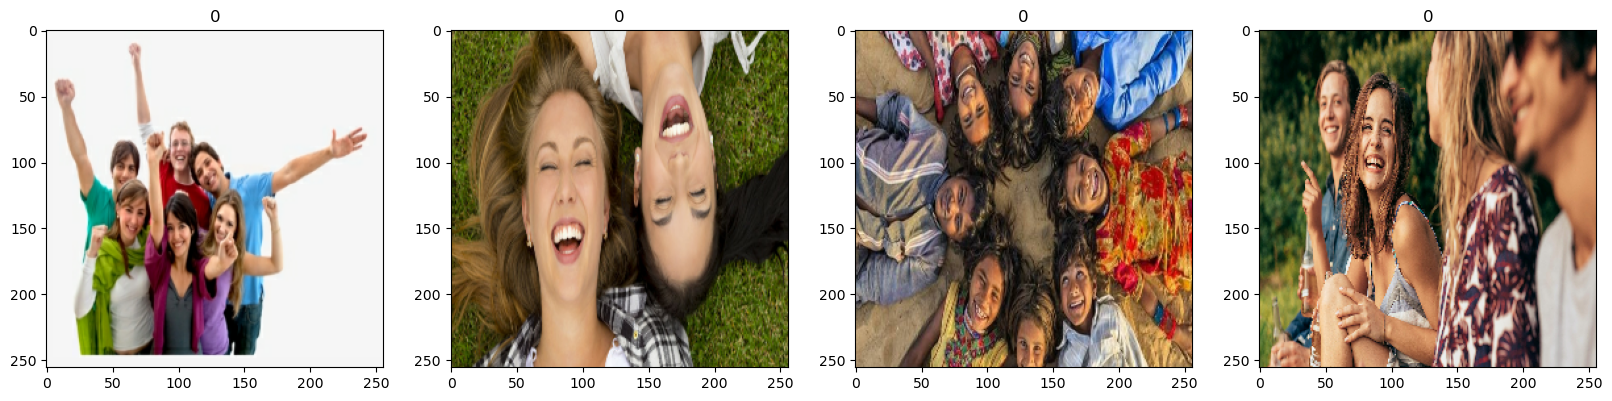

In [30]:
# 0 = happy
# 1 = sad


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
data.as_numpy_iterator().next()

(array([[[[1.85500000e+02, 1.36076172e+02, 5.12167969e+01],
          [1.51304688e+02, 1.12351562e+02, 3.25214844e+01],
          [1.39181641e+02, 1.05275391e+02, 3.09238281e+01],
          ...,
          [1.35593750e+02, 1.07992188e+02, 1.26953125e-01],
          [1.18423828e+02, 9.28730469e+01, 0.00000000e+00],
          [1.54974609e+02, 1.14097656e+02, 5.41992188e+00]],
 
         [[1.86228516e+02, 1.36945312e+02, 3.34433594e+01],
          [1.59740234e+02, 1.18304688e+02, 2.13457031e+01],
          [1.53544922e+02, 1.11109375e+02, 2.60859375e+01],
          ...,
          [1.20726562e+02, 9.24882812e+01, 2.19531250e+00],
          [1.17695312e+02, 8.84667969e+01, 0.00000000e+00],
          [1.55423828e+02, 1.12923828e+02, 1.21679688e+00]],
 
         [[1.85003906e+02, 1.37761719e+02, 1.24687500e+01],
          [1.67789062e+02, 1.21904297e+02, 6.86132812e+00],
          [1.64142578e+02, 1.14630859e+02, 6.44531250e+00],
          ...,
          [1.11087891e+02, 8.80000000e+01, 7.3828

In [32]:
data.as_numpy_iterator().next()[0].max()

255.0

In [33]:
data= data.map(lambda x,y:(x/255,y))

In [34]:
data.as_numpy_iterator().next()

(array([[[[1.71124384e-01, 1.59359679e-01, 1.39751837e-01],
          [1.79993868e-01, 1.68229163e-01, 1.48621321e-01],
          [1.67371318e-01, 1.55606613e-01, 1.35998771e-01],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.64186493e-01, 1.52421772e-01, 1.32813931e-01],
          [1.55947939e-01, 1.44183233e-01, 1.24575384e-01],
          [1.43903181e-01, 1.32138476e-01, 1.12530634e-01],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.71553314e-01, 1.59788609e-01, 1.40180767e-01],
          [1.50328875e-01, 1.38564169e-01, 1.18956320e-01],
          [1.26348034e-01, 1.14583336e-01, 9.49754938e-02],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [35]:
data.as_numpy_iterator().next()[0].max()

1.0

In [36]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [37]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [43]:
logdir='logs'

In [44]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 1.2524 - accuracy: 0.5104 - val_loss: 0.7319 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.7889 - accuracy: 0.4062 - val_loss: 0.6937 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6982 - accuracy: 0.5417 - val_loss: 0.6643 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.6673 - accuracy: 0.6771 - val_loss: 0.6549 - val_accuracy: 0.7188
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6436 - accuracy: 0.7500 - val_loss: 0.5774 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.5917 - accuracy: 0.6562 - val_loss: 0.5995 - val_accuracy: 0.6875
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.6013 - accuracy: 0.6875 - val_loss: 0.5164 - val_accuracy: 0.7188
Epoch 8/20
3/3 [=========================

In [47]:
import pickle
pickle.dump(model,open("model1.pkl","wb"))

In [48]:
hist.history

{'loss': [1.2523561716079712,
  0.7889119982719421,
  0.6981556415557861,
  0.6673497557640076,
  0.6435961723327637,
  0.5916979908943176,
  0.6013273000717163,
  0.5329235196113586,
  0.42062148451805115,
  0.40778446197509766,
  0.3511098325252533,
  0.2788360118865967,
  0.2616235911846161,
  0.22453509271144867,
  0.18658237159252167,
  0.12182740122079849,
  0.1411961168050766,
  0.08438321948051453,
  0.07421134412288666,
  0.0861266478896141],
 'accuracy': [0.5104166865348816,
  0.40625,
  0.5416666865348816,
  0.6770833134651184,
  0.75,
  0.65625,
  0.6875,
  0.7708333134651184,
  0.8958333134651184,
  0.8229166865348816,
  0.8333333134651184,
  0.90625,
  0.8854166865348816,
  0.9479166865348816,
  0.9791666865348816,
  0.9791666865348816,
  0.9583333134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9791666865348816],
 'val_loss': [0.731857419013977,
  0.6936811804771423,
  0.6642811894416809,
  0.6548783779144287,
  0.5773772597312927,
  0.5995467901229858,
  0.516

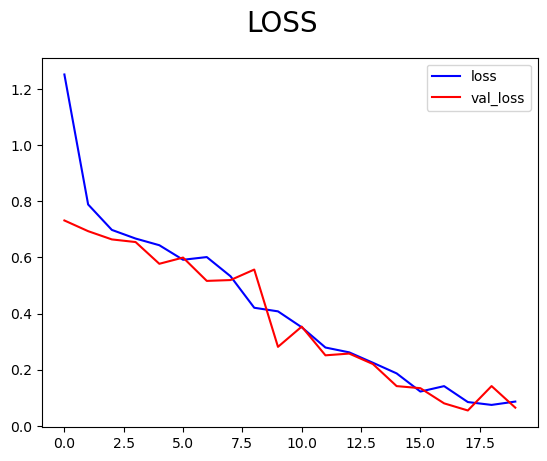

In [49]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

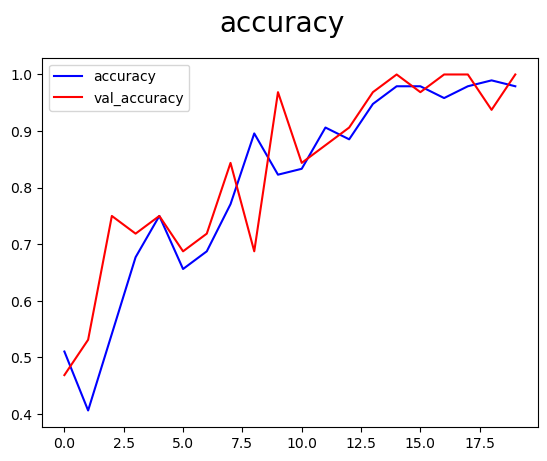

In [50]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

In [55]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [56]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [58]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 0.0 Recall: 0.0  Accuracy : 0.0 


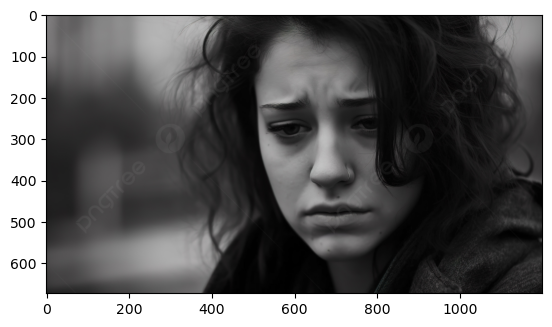

In [59]:
# Download a new image from Internet for testing model and after that do this codes: 
img=cv2.imread('img1.jpg')
# Sad.jpg is the new pic
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

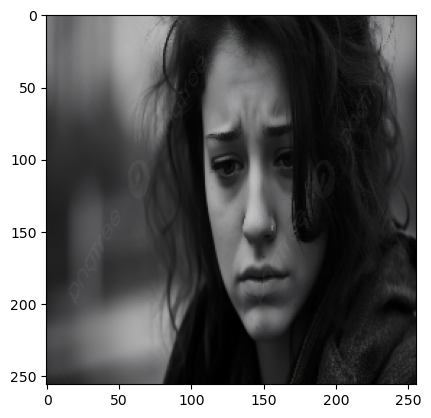

In [60]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
resize.shape

TensorShape([256, 256, 3])

In [67]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [68]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 37ms/step


In [69]:
yhat

array([[0.83044446]], dtype=float32)

In [70]:
if yhat > 0.5:
    print (' this pic is SAD :(')
else:
    print (" this pic is SOOOOOOO HAAAAAPY :)")

 this pic is SAD :(
